In [10]:
filepath = 'Day15Input.txt'

# Problem 1

In [11]:
class Sensor:
    def __init__(self, x, y, beacon_x, beacon_y):
        self.x = x
        self.y = y
        self.closest_beacon = (beacon_x, beacon_y)
        self.distance = self.compute_distance(beacon_x, beacon_y)
        
    def compute_distance(self, beacon_x, beacon_y):
        return abs(self.x - beacon_x) + abs(self.y - beacon_y)

    def __str__(self):
        return f'x: {self.x}, y: {self.y}, distance: {self.distance}'

In [12]:
with open(filepath) as f:
    lines = [l.strip() for l in f.readlines()]
    
sensors, beacons = [] , []
world_size = [[0, 0], [0, 0]]
for line in lines:
    sensor, beacon = line.split(': closest beacon is at ')
    
    sensor = sensor.replace(',', '').split(' ')[2:]
    sensor_x, sensor_y = int(sensor[0].split('=')[1]), int(sensor[1].split('=')[1])
    
    beacon = beacon.split(', ')
    beacon_x, beacon_y = int(beacon[0].split('=')[1]), int(beacon[1].split('=')[1])
    
    sensors.append(Sensor(sensor_x, sensor_y, beacon_x, beacon_y))
    beacons.append((beacon_x, beacon_y))
    
    if sensor_x < world_size[0][0]:
        world_size[0][0] = sensor_x
    if sensor_x > world_size[0][1]:
        world_size[0][1] = sensor_x
    if beacon_x < world_size[0][0]:
        world_size[0][0] = beacon_x
    if beacon_x > world_size[0][1]:
        world_size[0][1] = beacon_x
    if sensor_y < world_size[1][0]:
        world_size[1][0] = sensor_y
    if sensor_y > world_size[1][1]:
        world_size[1][1] = sensor_y
    if beacon_y < world_size[1][0]:
        world_size[1][0] = beacon_y
    if beacon_y > world_size[1][1]:
        world_size[1][1] = beacon_y

In [13]:
ROW = 10 if 'Sample' in filepath else 2000000

no_beacon_count = 0
expansion = max(sensor.distance for sensor in sensors) + 5

for x in range(world_size[0][0] - expansion, world_size[0][1] + expansion):
    for sensor in sensors:
        if sensor.compute_distance(x, ROW) <= sensor.distance and (x, ROW) not in beacons:
            no_beacon_count += 1
            break
print(no_beacon_count)

4424278


# Problem 2

In [14]:
search_space = 20 if 'Sample' in filepath else 4_000_000

limit_corners = []
for s in sensors:
    x, y, d = s.x, s.y, s.distance + 1
    corners = [(x + d, y), (x, y + d), (x - d, y), (x, y - d)]
    corners.append(corners[0])
    
    limit_corners.append(corners)

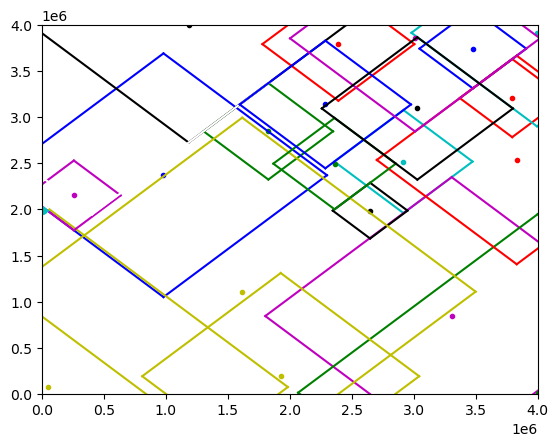

In [15]:
import matplotlib.pyplot as plt

colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'w']

plt.xlim(0, search_space)
plt.ylim(0, search_space)

for s_i, s in enumerate(limit_corners):
    
    color = colors[s_i % len(colors)]
    plt.plot(sensors[s_i].x, sensors[s_i].y, marker='o', markersize=3, color=color)
    
    for i in range(len(s) - 1):
        plt.plot([s[i][0], s[i + 1][0]], [s[i][1], s[i + 1][1]], '-', color=color)

plt.show()

In [16]:
# https://stackoverflow.com/questions/20677795/how-do-i-compute-the-intersection-point-of-two-lines

def get_intersection(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
       return False

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return x, y

In [17]:
def is_valid_beacon_space(x, y):
    for sensor in sensors:
        if sensor.compute_distance(x, y) <= sensor.distance or (x, y) in beacons:
            return False
    return True

In [20]:
done = False
for sensor_1_i in range(len(limit_corners)):
    if done:
        break
    for sensor_2_i in range(sensor_1_i + 1, len(limit_corners)):
        if done:
            break
        sensor_1 = limit_corners[sensor_1_i]
        sensor_2 = limit_corners[sensor_2_i]
        
        for i in range(len(sensor_1) - 1):
            if done:
                break
            for k in range(len(sensor_2) - 1):
                line_1 = [sensor_1[i], sensor_1[i + 1]]
                line_2 = [sensor_2[k], sensor_2[k + 1]]
                
                intersection = get_intersection(line_1, line_2)
                if intersection != False:
                    if not intersection[0] % 1 and not intersection[1] % 1:
                        if 0 <= intersection[0] <= search_space and 0 <= intersection[1] <= search_space:
                            if is_valid_beacon_space(intersection[0], intersection[1]):
                                print(int(4_000_000 * intersection[0] + intersection[1]))
                                done = True
                                break

10382630753392
